<a href="https://colab.research.google.com/github/Singhinderpal104/Ted-Talks-Views-Prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**




### *Founded by Richard Salman in 1984 as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED conferences have gone on to become the Mecca of ideas from virtually all walks of life. It is devoted to spreading powerful ideas on just about any topic. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.*

# **About the Dataset**

This dataset contains over 4000 TED talks including transcripts in many languages. 

*   Number of instances :- 4005
*   Number of features:- 19

About the features:


*   **talk_id**: Talk identification number provided by TED
*  **title**: Title of the talk
*   **speaker_1**: First speaker in TED's speaker list
*   **all_speakers**: Speakers in the talk
*   **occupations**: Occupations of the speakers
*   **about_speakers**: About each speaker
*   **recorded_date**: Date the talk was recorded
*   **published_date**: Date the talk was published to TED.com
*   **event**: Event or medium in which the talk was given
*   **native_lang**: Language the talk was given in
*    **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk

### **Target Variable**


*   **Views**: The count of views.











# **Objective**

### *To build a model which could help in predicting the views of the videos.*

# **Workflow**

1. Importing Libraries

2. Loading the Dataset

3. EDA

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Fitting the models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion

## **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_orignal=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/data_ted_talks.csv")
data=data_orignal.copy()
data

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

## **EDA**

In [ ]:
#dropping the url and talk_id column as they are not important
data=data.drop(columns=['url'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  description     4005 non-null   object 
 17  transcript      4005 non-null   o

In [ ]:
data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [ ]:
#checking for duplicates
data.duplicated().sum()

0

In [ ]:
#checking for null values
data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
description         0
transcript          0
dtype: int64

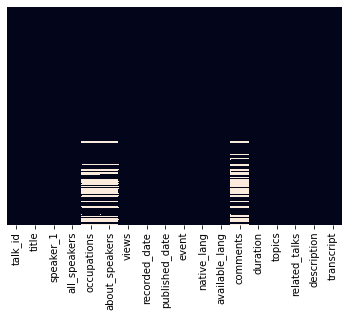

In [ ]:
#plotting the null values.
sns.heatmap(data.isna(),yticklabels=False,cbar=False)

### Exploring different **Columns**

**Speaker_1 Column**

In [ ]:
#getting the top 10 most viewed speakers with the views and title of the videos
df1=data.nlargest(10,['views'])
df1[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


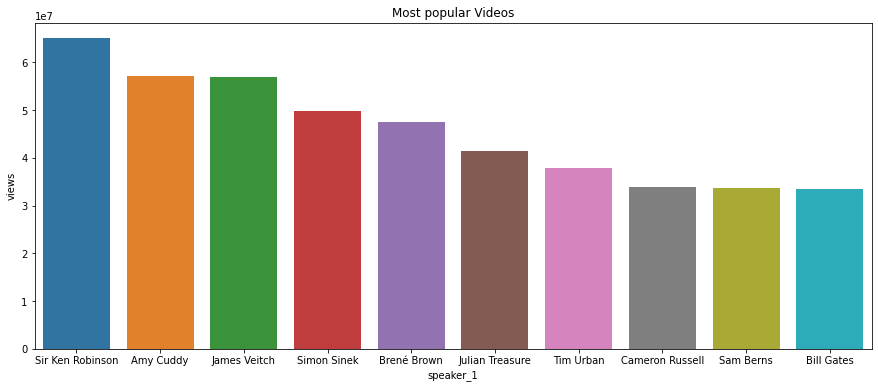

In [ ]:
#plotting the above result
plt.figure(figsize=(15,6))
plt.title("Most popular Videos")
plt.xlabel("Speakers")
plt.ylabel("Views")
sns.barplot(x='speaker_1',y='views',data=df1)

We can see that the video on "Do schools kill creativity" by Sir Ken Robinson has the most number of views, followed by Amy Cuddy's talk on "Your body language may shape who you are."
---



In [ ]:
#getting the most popular speaker
df2=data.groupby('speaker_1').agg({'views':'sum'}).nlargest(15,['views'])
df2.reset_index(inplace=True)
df2

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


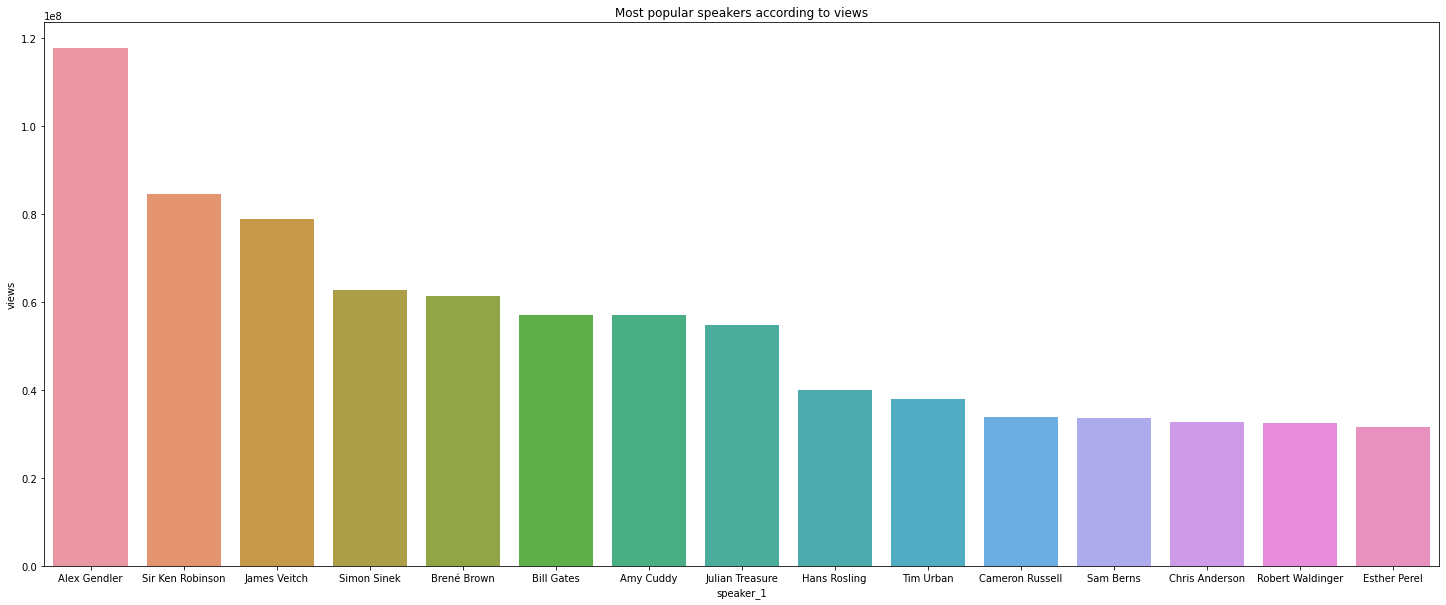

In [ ]:
#plotting the above result
plt.figure(figsize=(25,10))
plt.title("Most popular speakers according to views")
sns.barplot(x='speaker_1',y='views',data=df2)

We can conclude that Alex Gendler is the most popular speaker followed by Sir Ken Robinson

**Event Column**

In [ ]:
#getting the number of unique events
len(data['event'].unique())

459

In [ ]:
#getting the most frequent event categories
df3=data[['event','views']].groupby('event').agg({'views':'count'}).nlargest(10,['views'])
df3.reset_index(inplace=True)
df3

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


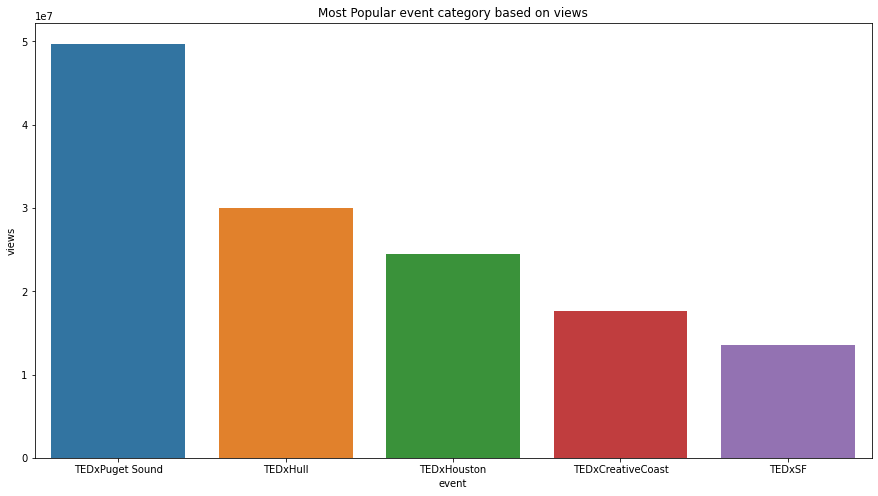

In [ ]:
#getting the most popular event category
df4=data[['event','views']].groupby('event').agg({'views':'mean'}).nlargest(5,['views'])
df4.reset_index(inplace=True)
plt.figure(figsize=(15,8))
plt.title('Most Popular event category based on views')
sns.barplot(x='event',y='views',data=df4)

So we can hence conclude that TEDEd is the most popular event category having the maximum number of views followed by TED2015

**native_lang Column**

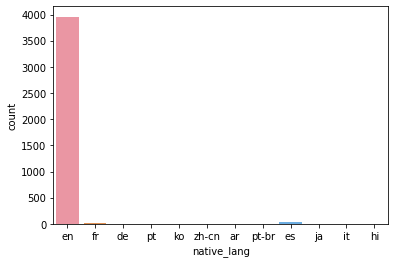

In [ ]:
#plotting the counts of different languages
sns.countplot(data['native_lang'])

We see that 90% of the counts are of the English Language, and this would create a bias in the model building hence we remove this column.


In [ ]:
data=data.drop(columns=['native_lang'])

**Title Column**

There are 157160 words in the titles


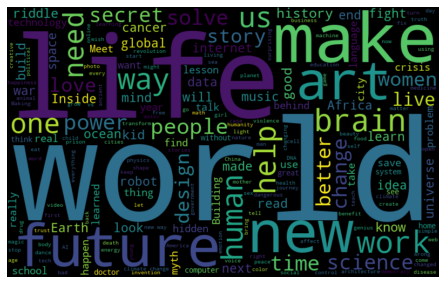

In [ ]:
#plotting the wordcloud to get the frequent title names.
from wordcloud import WordCloud,ImageColorGenerator
text=" ".join(topic for topic in data['title'].astype(str))
print('There are {} words in the titles'.format(len(text)))

wordcloud=WordCloud(background_color='black',width=800,height=500).generate(text)
plt.axis('off')
plt.rcParams['figure.figsize']=(15,10)
plt.tight_layout(pad=0)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

**Topics Column**

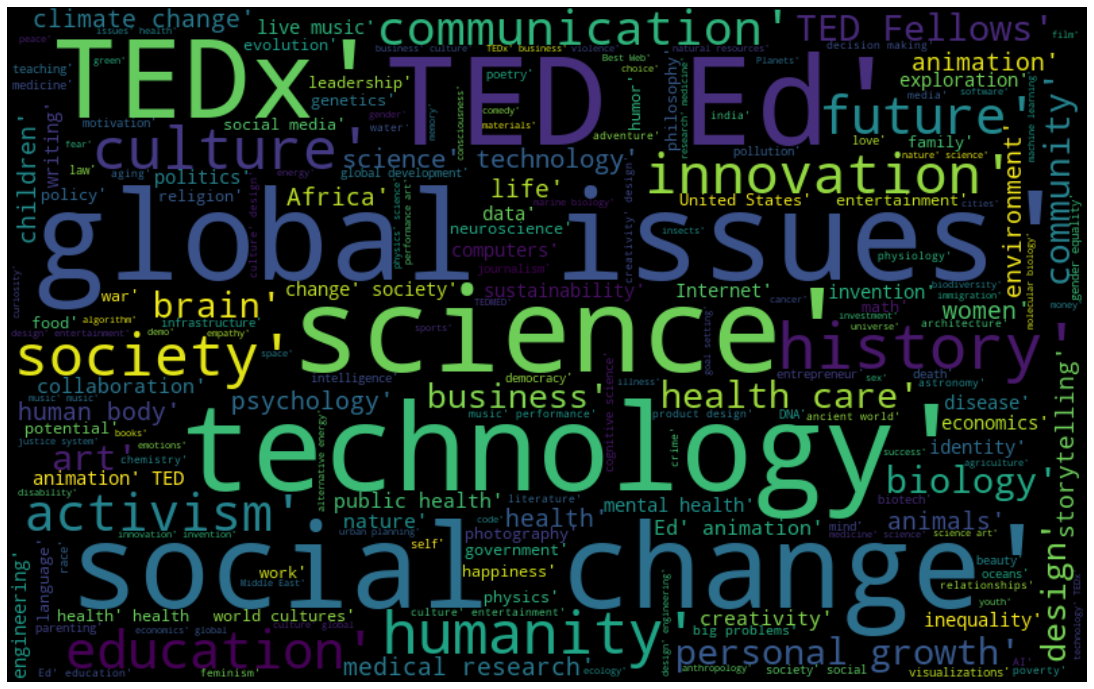

In [ ]:
#plotting the most popular topic tags
text1=" ".join(topic for topic in data['topics'])
wordcloud=WordCloud(background_color='black',width=800,height=500).generate(text1)
plt.axis("off")
plt.rcParams["figure.figsize"] = (15,10)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**Ocupation Column**

In [ ]:
data['occupations'].isna().sum()

522

Replace the null values with a category called 'other'

In [ ]:
for i,row in data.iterrows():
  if pd.isnull(row['occupations']):
    data['occupations'][i]=str({0:'Other'})

In [ ]:
#applying the eval function on occupations column to convert it into a list
data['occupations']=data.apply(lambda z: eval(z['occupations']),axis=1)

In [ ]:
#defining a new feature
data['occupation']='other'
#iterating over each row and extracting the occupations of speakers
for i,row in data.iterrows():
  occup_list=list(row['occupations'].values())[0][0]
  data.loc[i,'occupation']=str(occup_list)

In [ ]:
#checking the unique occupations in the new feature
len(data['occupation'].unique())

1552

Hence now we have 1552 unique occupations

Text(0.5, 1.0, 'Top 10 most frequent occupations')

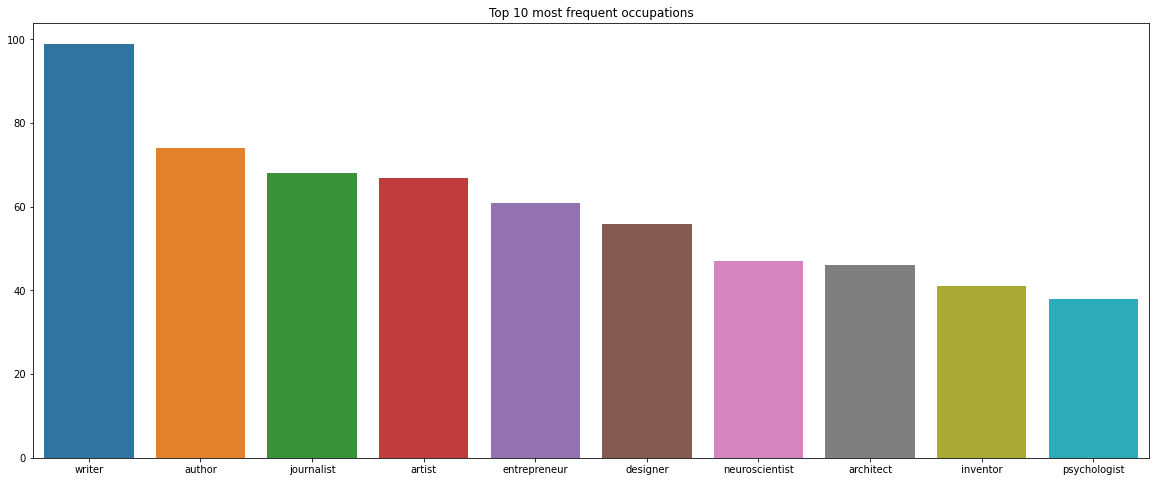

In [ ]:
#plotting the most frequent occupations
df5=data[data['occupation']!='O'] #removing the other category.
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(x=df5['occupation'].value_counts(ascending=False).head(10).index,
              y=df5['occupation'].value_counts(ascending=False).head(10).values,
              ax=ax)
plt.title('Top 10 most frequent occupations')

We can see that most of the speakers are writers followed by authors and journalists

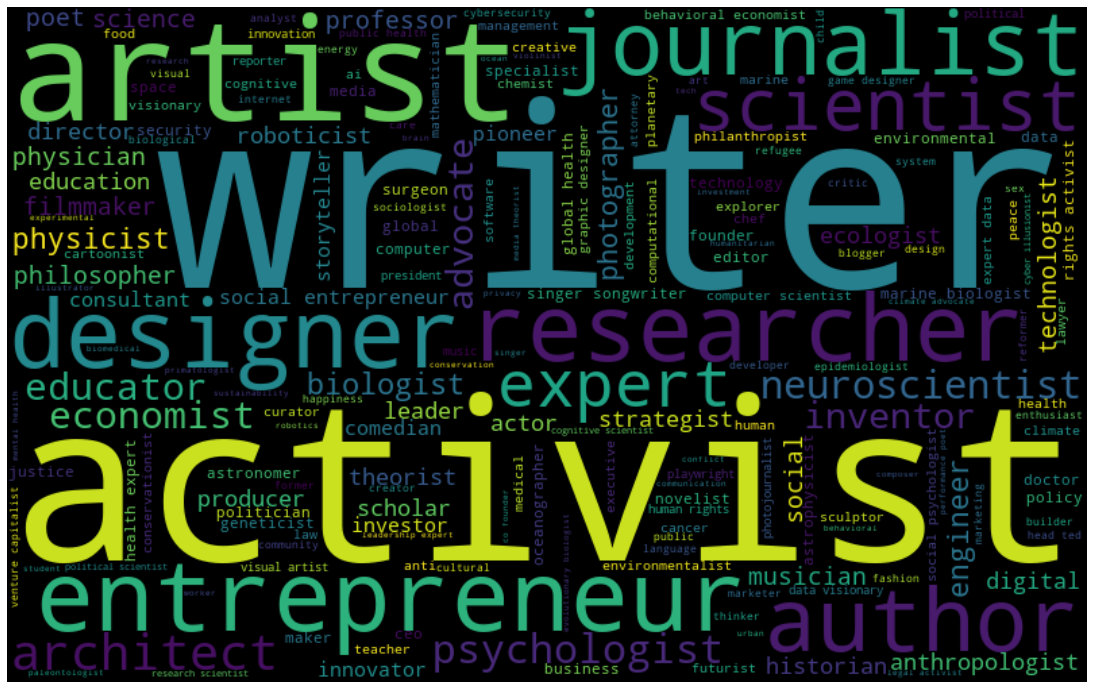

In [ ]:
#creating a wordcloud for occupations
text=" ".join(occ for occ in data['occupation'].astype(str))
wordcloud=WordCloud(background_color='black',width=800,height=500).generate(text)
plt.axis("off")
plt.rcParams["figure.figsize"] = (15,10)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**Published_date Column**

In [ ]:
#applying strptime on published_date column
import datetime
data['published_date'] = data['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
#extracting release day, month and year from the published date column
#adding 3 separate columns as release_day,release_month,release_year
data['release_day'] = data['published_date'].apply(lambda x: x.weekday())
data['release_month']=data['published_date'].apply(lambda x: x.month)
data['release_year'] = data['published_date'].apply(lambda x: x.year)

In [ ]:
#mapping of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
data['release_day']=data['release_day'].map(week_day)

Text(0.5, 1.0, 'Most frequent release day')

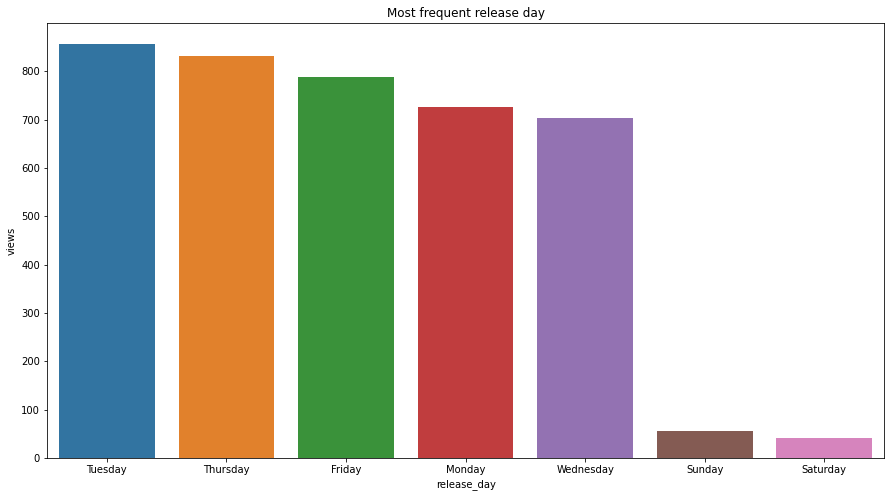

In [ ]:
#checking the most frequent release day of the week
freq_rel_day=data[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title("Most frequent release day")

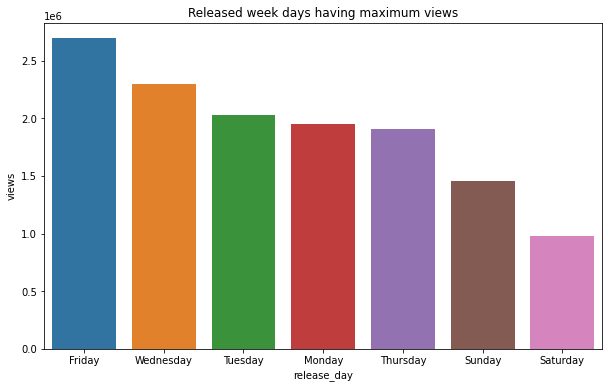

In [ ]:
#checking the best release day based on the views
pop_rel_day=data[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)
plt.figure(figsize=(10,6))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=pop_rel_day)



*  We can see that most videos are published on Tuesdays followed by Thursdays.
*  But the videos published on Fridays have the most number of views, followed by those published on Wednesdays.
* Hence we conclude that a Friday release impacts the views of the videos.



In [ ]:
#encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['release_month']=data['release_month'].map(month_dict)

Text(0.5, 1.0, 'Most frequent release months')

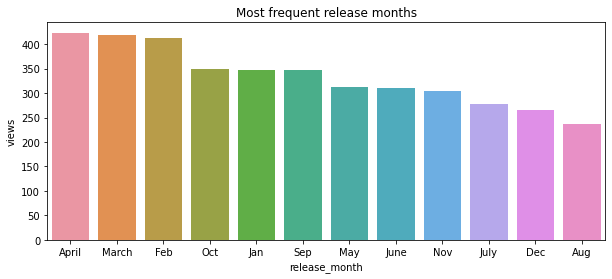

In [ ]:
#Plotting months having maximum release 
freq_rel_month=data[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
plt.figure(figsize=(10,4))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

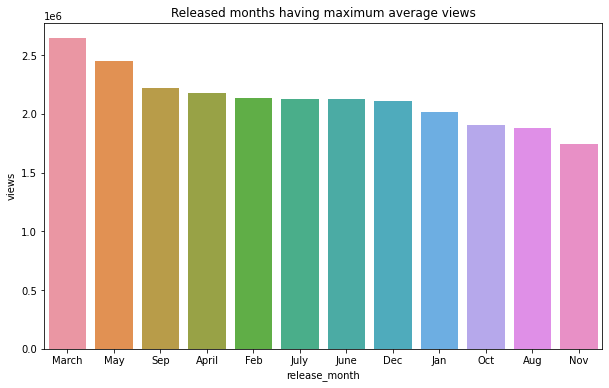

In [ ]:
#Plotting the most popular release month according to average Views
pop_rel_month=data[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)
plt.figure(figsize=(10,6))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)





*   Most videos are published in the month of April.
*   But the videos released in March have the most number of views.




Text(0.5, 1.0, 'Most frequent release years')

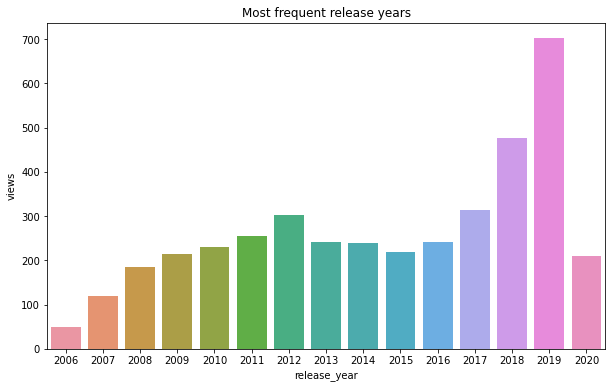

In [ ]:
#Plotting years having maximum release 
freq_rel_year=data[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)
plt.figure(figsize=(10,6))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title("Most frequent release years")

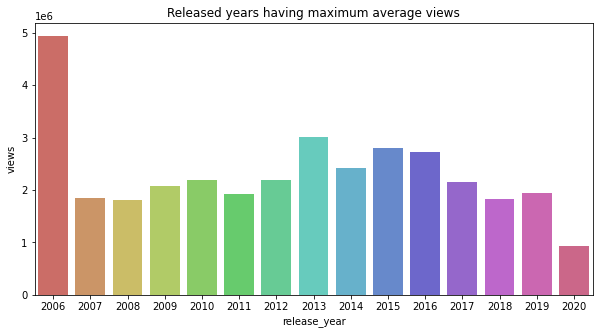

In [ ]:
#Plotting the most popular release years according to AVERAGE Views
pop_rel_year=data[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)
plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views',data=pop_rel_year,palette='hls')



*   Most videos were published in 2019 followed by 2018 and 2017
*   But the videos published in 2006 have the most number of views followed by 2013 and 2015



**Visualizing the Numerical Features**

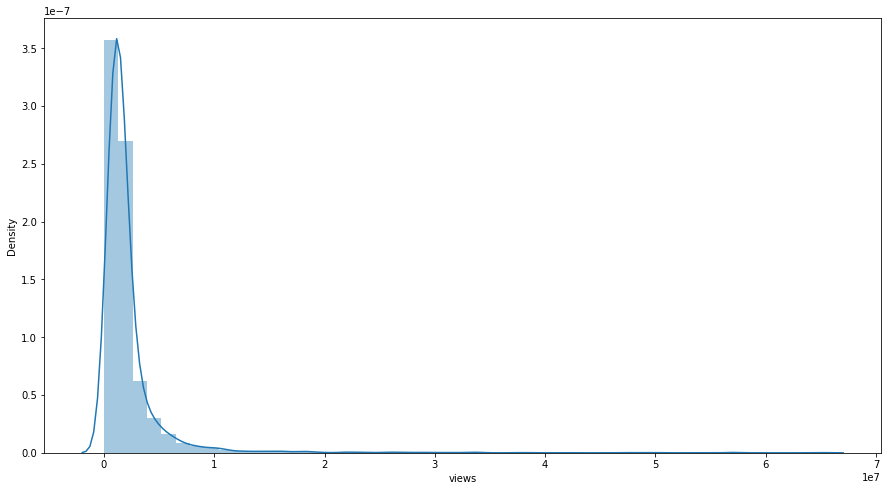

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data['views'])

We can see that the target variable is right skewed

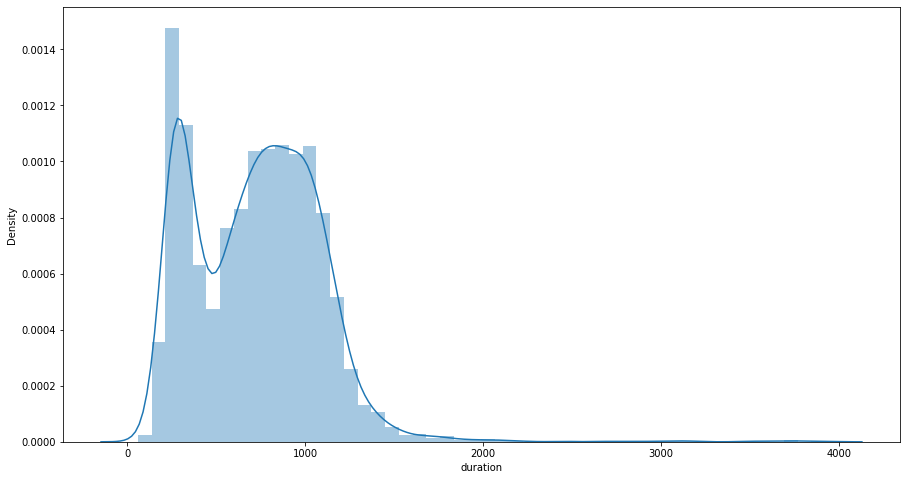

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data['duration'])

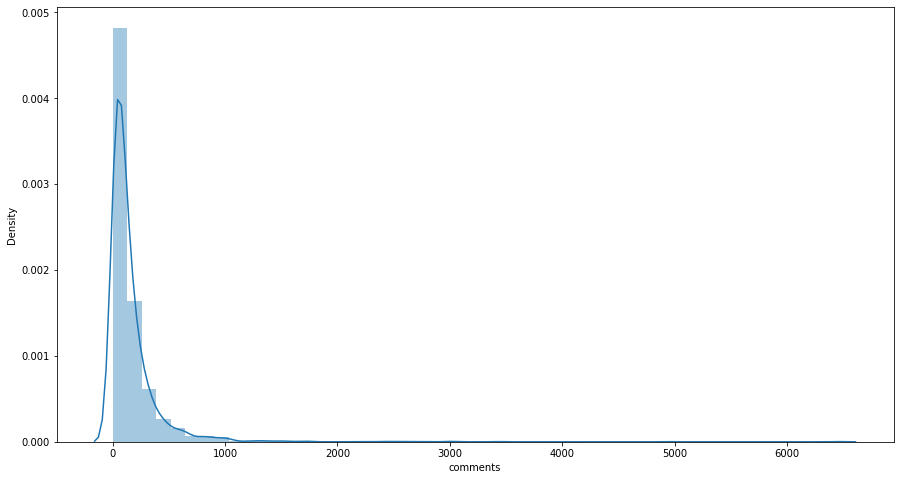

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data['comments'])

## **Feature Engineering**

We use Target Encoding for encoding the categorical features. 
Target encoding is the process of replacing a categorical value with the mean of the target variable. Any non-categorical columns are automatically dropped by the target encoder model.

In [ ]:
#run this to install the required library
#pip install category_encoders

In [ ]:
import category_encoders as ce
encoder=ce.TargetEncoder()

**Event Column**

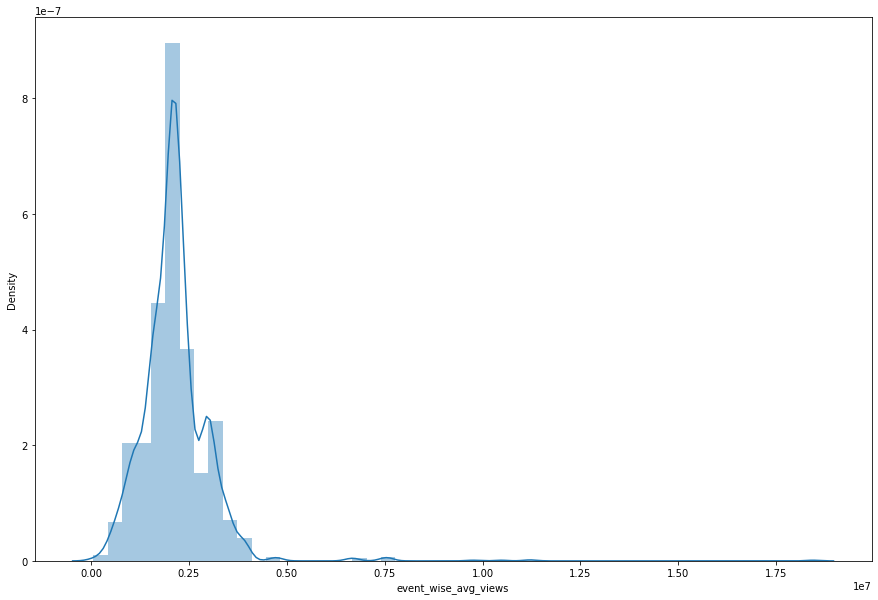

In [ ]:
#applying target encoder on event column with views as the target variable
data['event_wise_avg_views']=encoder.fit_transform(data['event'],data['views'])
sns.distplot(data['event_wise_avg_views'])

**speaker_1 Column**

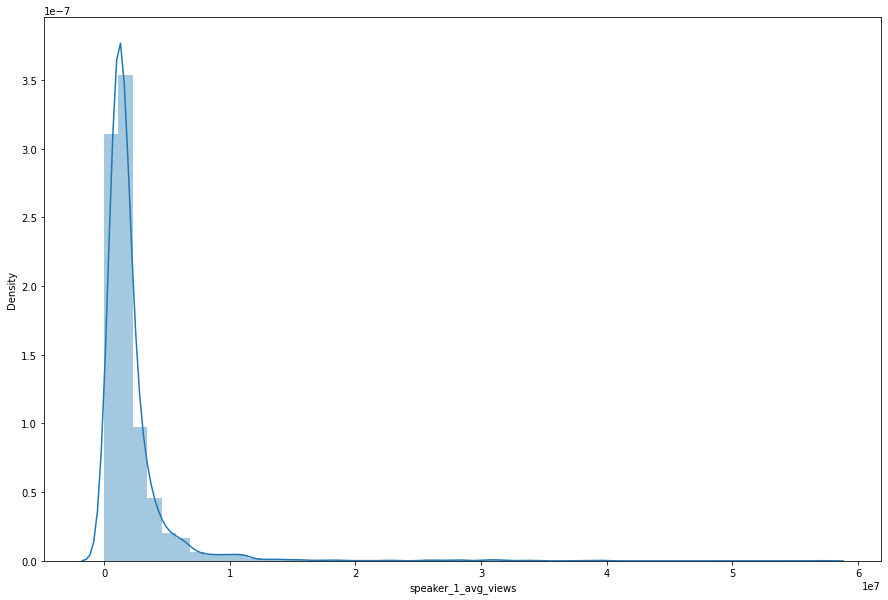

In [ ]:
#Doing target encoding on speaker_1 column
pop_speaker=data.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
data['speaker_1_avg_views']=data['speaker_1'].map(pop_speaker)
sns.distplot(data['speaker_1_avg_views'])

In [ ]:
#dropping the event column
data=data.drop(columns='event')

**available_lang Column**

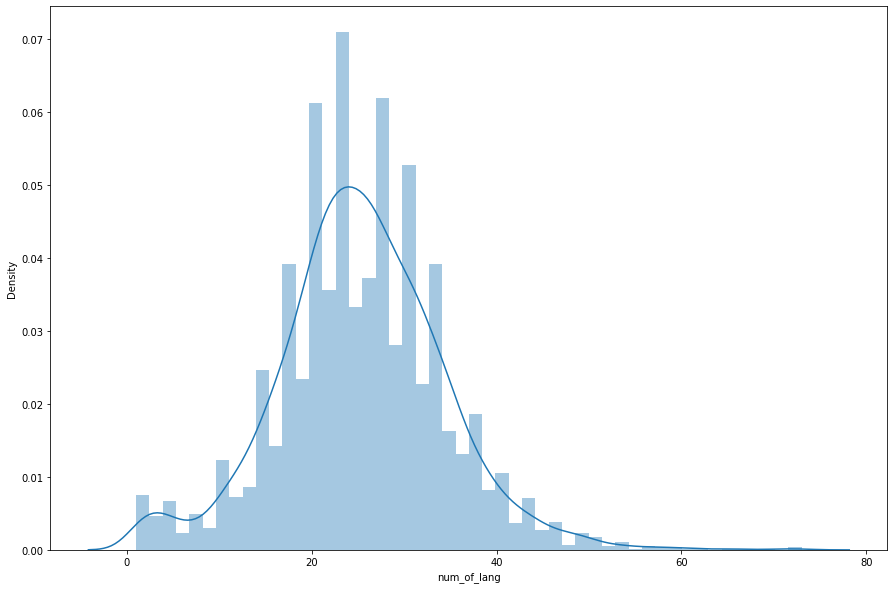

In [ ]:
#applying eval function on the column to convert into list
data['available_lang']=data.apply(lambda z: eval(z['available_lang']),axis=1)
#creating a new feature which contains the count of total number of languages
data['num_of_lang']=data.apply(lambda x: len(x['available_lang']),axis=1)
sns.distplot(data['num_of_lang'])

In [ ]:
#dropping the available_lang column
data=data.drop(columns='available_lang')

**Topics Column**

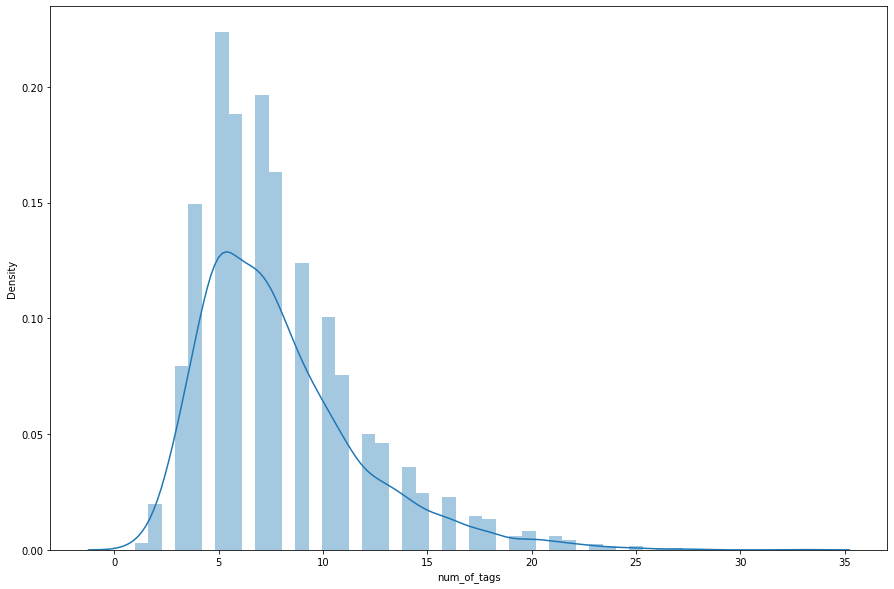

In [ ]:
#applying the eval function to convert the column into list
data['topics']=data.apply(lambda z: eval(z['topics']),axis=1)
#adding a new feature which contains the count of the number of topics
data['num_of_tags']=data.apply(lambda x: len(x['topics']),axis=1)
sns.distplot(data['num_of_tags'])

In [ ]:
#encoding the topics column.
#extracting the unique topics from topics list of each talk
unique_topics=[]
for i in range(0,len(data)):
  temp=data['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)
      
len(unique_topics)

457

In [ ]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(data)):
    temp2=data['topics'][i]
    if(topic in temp2):
      temp+=data['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(data)):
  temp=0
  temp_topic=data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
data['topics_wise_avg_views'] = se.values

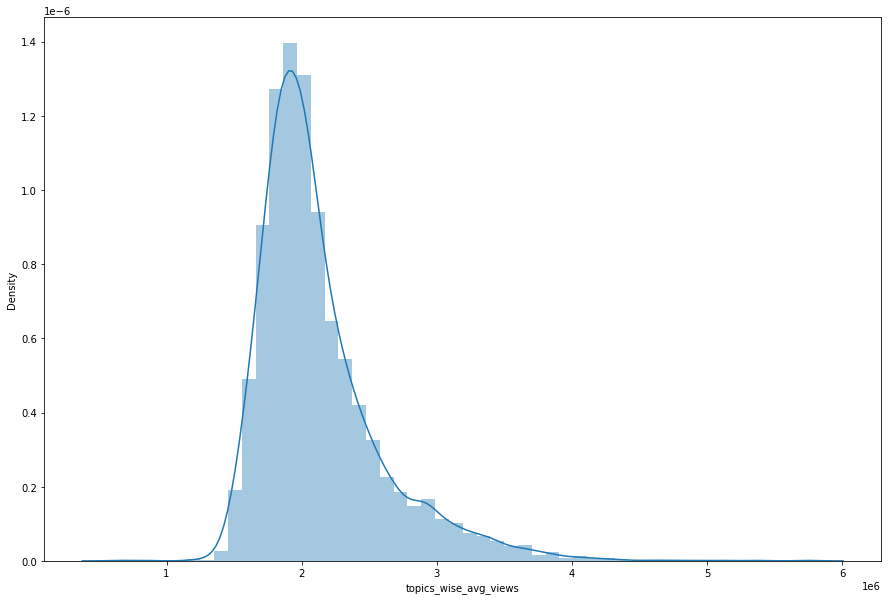

In [ ]:
sns.distplot(data['topics_wise_avg_views'])

**published_data Column**

In [ ]:
#adding a new feature video_age which stores the age of the videos as current year-published year
data['video_age']=2021-data['release_year']

In [ ]:
#dropping the published_date column
data=data.drop(columns='published_date')

**related_talks Column**

In [ ]:
#applying eval function to convert the column into list
data['related_talks'] = data.apply(lambda z: eval(z['related_talks']), axis=1)

In [ ]:
data['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

In [ ]:
#defining a new feature called related_views
data['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(data)):
      if (data.loc[i,'talk_id']) in id_list:
        temp+=data.loc[i,'views']

    data.loc[index,'related_views']=temp//6

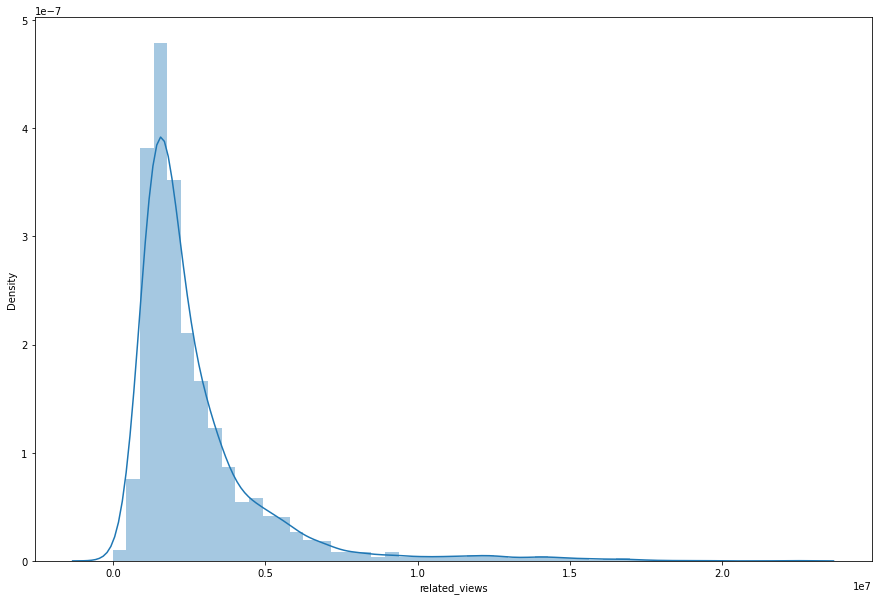

In [ ]:
sns.distplot(data['related_views'])

## **Data Cleaning**

**Outlier Treatment**

In [ ]:
#checking for outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
comments                 261
description                0
duration                  21
event_wise_avg_views     119
num_of_lang              121
num_of_tags              116
occupation                 0
occupations                0
recorded_date              0
related_talks              0
related_views            300
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views      373
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views    242
transcript                 0
video_age                  0
views                    393
dtype: int64

In [ ]:
#replacing the outliers with extreme values
for i in ['comments','duration','num_of_lang','num_of_tags','related_views','views','speaker_1_avg_views','topics_wise_avg_views','event_wise_avg_views']:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1

  data[i]=np.where(data[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(data[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),data[i]))

In [ ]:
#checking the outliers again
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
comments                   0
description                0
duration                   0
event_wise_avg_views       0
num_of_lang                0
num_of_tags                0
occupation                 0
occupations                0
recorded_date              0
related_talks              0
related_views              0
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views        0
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views      0
transcript                 0
video_age                  0
views                      0
dtype: int64

In [ ]:
#dropping the columns which are not important
data=data.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'recorded_date','topics','related_talks','transcript','description','occupation','release_year'])

**Imputing the missing values using KNN Imputer**

In [ ]:
data['comments'].isna().sum()

655

In [ ]:
#splitting the predictors and target to avoid alterations in the target variable
x=data.iloc[:,data.columns !='views']
y=data['views']

In [ ]:
#One Hot encoding on categorical features.
x=pd.get_dummies(x)
x.shape

(4005, 28)

In [ ]:
#taking only numercial features for imputing
num_df=['comments','duration','speaker_1_avg_views','event_wise_avg_views']

In [ ]:
#Scaling the dataset before imputing to avoid bias
scaler=MinMaxScaler()
from sklearn.impute import KNNImputer
imputer=KNNImputer()
imputer.fit(scaler.fit_transform(x[num_df]))
x[num_df]=imputer.transform(scaler.fit_transform(x[num_df]))
#inverse transforming the data
x[num_df]=scaler.inverse_transform(x[num_df])

In [ ]:
x['comments'].isna().sum()

0

## **Feature Selection**

**Feature Selection using f_regression**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
f_scores=f_regression(x,y)
f_scores

(array([1.58129076e+03, 3.63920086e+01, 4.22023345e+02, 1.61894391e+04,
        9.43117088e+02, 2.22138034e+00, 8.21343686e+02, 7.26280093e-01,
        6.34241154e+02, 4.93457071e+01, 2.14095360e+00, 1.69801520e+01,
        1.32688878e+01, 4.22782469e+00, 1.54608611e+00, 5.17596240e-03,
        4.42937898e+00, 5.29481408e-01, 3.19042540e+00, 9.10855944e-01,
        3.61273001e+00, 1.59320065e+00, 7.00546927e-01, 1.20164944e+01,
        3.34840829e+00, 3.24993722e+00, 6.69041425e+00, 1.59197663e+00]),
 array([9.83297570e-292, 1.75975910e-009, 3.05309155e-089, 0.00000000e+000,
        3.67017071e-186, 1.36190106e-001, 1.81039118e-164, 3.94142602e-001,
        4.87581533e-130, 2.51061953e-012, 1.43491232e-001, 3.85368618e-005,
        2.73265521e-004, 3.98310726e-002, 2.13786984e-001, 9.42649939e-001,
        3.53875418e-002, 4.66867525e-001, 7.41463988e-002, 3.39945041e-001,
        5.74106856e-002, 2.06942978e-001, 4.02649944e-001, 5.32863676e-004,
        6.73443607e-002, 7.15013746e-0

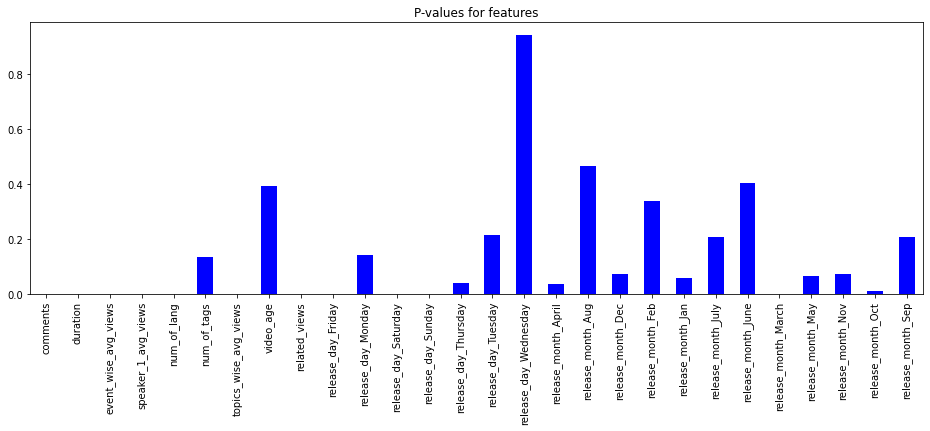

In [ ]:
#plotting the second array which contains the required p-values
p_values=pd.Series(f_scores[1],index=x.columns)
plt.title("P-values for features")
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.show()

We can drop the features having a high p-value.

In [ ]:
#creating a list of the important features
ll=['comments', 'duration', 'num_of_lang', 'num_of_tags','event_wise_avg_views',
       'related_views', 'release_day_Friday','speaker_1_avg_views','topics_wise_avg_views']

In [ ]:
#taking only the important features
x=x[ll]
x.shape

(4005, 9)

**Plotting the heatmap for correlations**

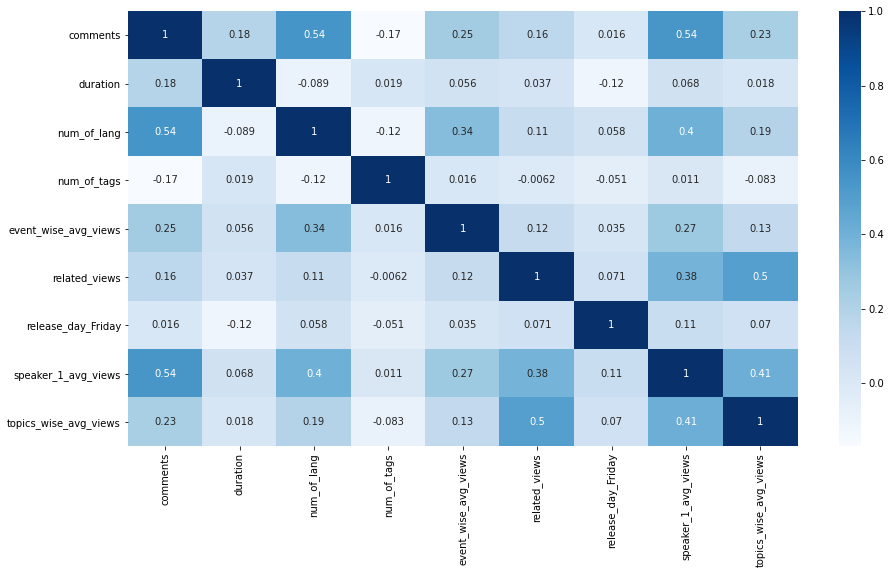

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(x.corr(),annot=True,cmap='Blues')

## **Model Building**

In [ ]:
#splitting the data into train and test sets with 30% test size
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Trying the linear regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)
reg_pred_train=reg.predict(x_train)
reg_pred_test=reg.predict(x_test)

MSE=mean_squared_error(y_test,reg_pred_test)
RMSE=np.sqrt(MSE)
print('RMSE on test set: ',RMSE)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, reg_pred_train)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, reg_pred_test)))

RMSE on test set:  497470.1262255782
Training MAE: 254717.80
Test MAE: 269496.22


**Random Forest Regressor**

In [ ]:
rf = RandomForestRegressor(criterion='mae')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 93715.72
Test MAE: 246540.39
Target mean: 1661354.12
Target std: 1102595.71


In [ ]:
"""Using Randomised Search to tune the hyperparameters
Defining the parameters"""
n_estimators=[100,150,200]
max_depth=[6,8,10]
min_samples_split=[50,100,150]
min_samples_leaf=[10,30,50]
param_dict={'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

#creating an instance of the model.
rf_instance=RandomForestRegressor(criterion='mae')
from sklearn.model_selection import KFold
rf_random=RandomizedSearchCV(estimator=rf_instance,param_distributions=param_dict,verbose=0,cv=KFold())
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf...
                                

In [ ]:
print('Best : {}, using {}'.format(rf_random.best_score_,rf_random.best_params_))

Best : 0.809688557063738, using {'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_depth': 10}


In [ ]:
#creating the optimised model
rf_optimal=rf_random.best_estimator_
rf_optimal

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#calculating the MAE
y_pred=rf_optimal.predict(x_train)
y_test_pred=rf_optimal.predict(x_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 182199.47
Test MAE: 201901.72


In [ ]:
#storing the results in a dataframe
rf=RandomForestRegressor(criterion='mae',max_depth=10,min_samples_leaf=10,min_samples_split=100,n_estimators=200)
rf_optimal_model=rf.fit(x_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'RandomForestRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, rf_optimal_model.predict(x_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, rf_optimal_model.predict(x_test))
model_dict["R2_Score_train"] = r2_score(y_train,rf_optimal_model.predict(x_train))
model_dict["R2_Score_test"] = r2_score(y_test,rf_optimal_model.predict(x_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,rf_optimal_model.predict(x_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,rf_optimal_model.predict(x_test)))
model_data.append(model_dict)

results_df_rf = pd.DataFrame(model_data)

#printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,RandomForestRegressor,181955.6676,201838.248534,0.827127,0.803457,452382.230092,502963.178756


**XGBoost Regressor**

In [ ]:
# Number of trees
n_estimators = [100,150,200]
# Maximum depth of trees
max_depth = [6,8,10]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [30,40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=0,cv=KFold())
xgb_random.fit(x_train,y_train)

[19:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:03:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:03:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:03:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter

In [ ]:
print('Best : {}, using {}'.format(xgb_random.best_score_,xgb_random.best_params_))

Best : 0.8251780436945018, using {'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 50, 'max_depth': 6}


In [ ]:
xgb_optimal_model=xgb_random.best_estimator_

In [ ]:
y_pred = xgb_optimal_model.predict(x_train)
y_test_pred = xgb_optimal_model.predict(x_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 105597.75
Test MAE: 247731.74


In [ ]:
#storing the results in a dataframe
xgb=XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=6, min_samples_leaf=50,
             min_samples_split=100, n_estimators=100)
xgb_optimal_model=xgb.fit(x_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'XGBRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, xgb_optimal_model.predict(x_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, xgb_optimal_model.predict(x_test))
model_dict["R2_Score_train"] = r2_score(y_train,xgb_optimal_model.predict(x_train))
model_dict["R2_Score_test"] = r2_score(y_test,xgb_optimal_model.predict(x_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,xgb_optimal_model.predict(x_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,xgb_optimal_model.predict(x_test)))
model_data.append(model_dict)

results_df_xgb = pd.DataFrame(model_data)

#printing the results_df_xgb 
results_df_xgb

[19:08:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,XGBRegressor,105597.75474,247731.738165,0.967967,0.817589,194733.361562,484543.318983


In [ ]:
#storing the results from all the models in a dataframe
#Defining all these models
models = [
           ['Linear Regressor: ', LinearRegression()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=10,min_samples_leaf=10,min_samples_split=100,n_estimators=200)],
           ['XGBRegressor: ', XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=6, min_samples_leaf=50,
             min_samples_split=100, n_estimators=100)]        
        ]
model_data = []
for name,curr_model in models :
    model_dict = {}
    curr_model.random_state = 78
    model_dict["Model_Name"] = name
    curr_model.fit(x_train,y_train)
    model_dict["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(x_train))
    model_dict["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(x_test))
    model_dict["R2_Score_train"] = r2_score(y_train,curr_model.predict(x_train))
    model_dict["R2_Score_test"] = r2_score(y_test,curr_model.predict(x_test))
    model_dict["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(x_train)))
    model_dict["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(x_test)))
    model_data.append(model_dict)

[19:13:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
comparision_df = pd.DataFrame(model_data)
comparision_df

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,Linear Regressor:,254717.799501,269496.224745,0.819552,0.807727,462186.935756,497470.126226
1,RandomForest,181971.554168,201837.576082,0.825692,0.800986,454256.064071,506115.207772
2,XGBRegressor:,105597.754740,247731.738165,0.967967,0.817589,194733.361562,484543.318983


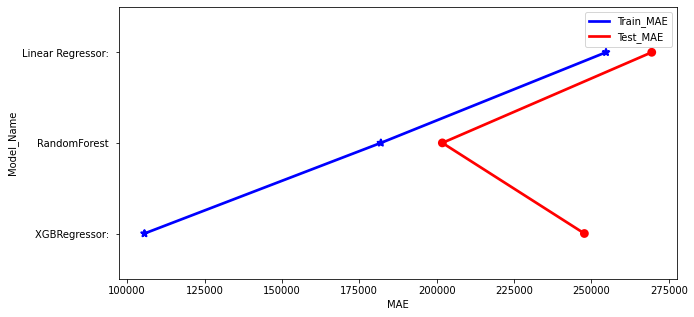

In [ ]:
#plotting the MAE on train and test sets for different models.
x=plt.figure(figsize=(10,5))
# plotting columns
ax = sns.pointplot(x=comparision_df["MAE_train"], y=comparision_df["Model_Name"], color='b',alpha=0.2,labels=('MAE_train'), markers = '*')
ax = sns.pointplot(x=comparision_df["MAE_test"], y=comparision_df["Model_Name"], color='r',alpha=0.7,labels=('MAE_test'),markers='o')
# renaming the axes
ax.set(xlabel="MAE", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(comparision_df)+1], labels=["Train_MAE","Test_MAE"])

## **Final Selection Of Model**

We choose MAE as the deciding loss fucntion as

RMSE is heavily influenced by outliers (higher the number of outliers, higher the RMSE value) whereas, MAE is linear and doesn't increase with the presence of outliers.

From the MAE we can conclude that Random Forest Regressor is the best model for this dataset.

In [ ]:
#printing the results of the Random Forest model
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,RandomForestRegressor,181955.6676,201838.248534,0.827127,0.803457,452382.230092,502963.178756


## **Conclusion**

Built 3 models:

*   Linear Regression
*   Random Forest Regressor
*   XGB Regressor

In all of the models, the errors have been in the range of 2,00,000 which is around 10% of the average views. This implies that the prediction was correct 90% of the time.

The Hyperparameter Tuning prevented overfitting and decreased errors by regularzing the models.

Given that there are only 10% errors, the models have performed well on unseen data.

The Random Forest Regressor performed the best in terms of Mean Absolute Error

## **Future Work**



*   Can do a Dynamic Regression Time Series Modelling due to the availbility of the time features
*   Can use Modelling to tackle views in each topic separately.



